# Olympic Data Analysis

In [1]:
import pandas as pd
import kagglehub
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

## Importing Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("piterfm/olympic-games-medals-19862018")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/piterfm/olympic-games-medals-19862018/versions/9


In [3]:
medals_df = pd.read_csv(f'{path}/olympic_medals.csv')
gdp_df = pd.read_csv('GDP.csv')
population_df = pd.read_csv('population_total.csv')
athletes = pd.read_csv('/content/olympic_athletes.csv')

## Analyzing Datasets

In [4]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,9.787080e+11,8.982780e+11,8.289430e+11,9.729990e+11,1.012310e+12,1.009720e+12,9.333920e+11,1.085750e+12,1.191420e+12,1.245470e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,8.974160e+11,7.717670e+11,6.943610e+11,6.878490e+11,7.704950e+11,8.264840e+11,7.898020e+11,8.493120e+11,8.839740e+11,7.991060e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.482465e+10


In [5]:
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0


In [6]:
medals_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [7]:
athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


## Data Cleaning

Remove non-countries from population df

In [8]:
values_list = medals_df['country_3_letter_code'].tolist()
clean_population = population_df.query("`Country Code` in @values_list")
clean_population.to_csv('clean_population.csv', index=False)

In [9]:
clean_medals = medals_df.replace(["United States of America", "People's Republic of China", 'london-2012', 'rio-2016', 'tokyo-2020', 'sochi-2014', 'pyeongchang-2018', 'beijing-2022'], ['United States', 'China', 'London 2012', 'Rio 2016', 'Tokyo 2020', 'Sochi 2014', 'Pyeongchang 2018', 'Beijing 2022'])
clean_medals.to_csv('clean_medals.csv', index=False)

## Data Visualizations

In [10]:
selected_years = ['2012', '2014', '2016', '2018', '2020', '2022']
all_years = ['2010'] + selected_years # Need to include 2010 for calculating the first percentage change
top_10_population = clean_population.nlargest(10, '2022')

In [11]:
fig = go.Figure()

# Add a line for each country
for country in top_10_population['Country Name']:
    country_data = top_10_population[top_10_population['Country Name'] == country]

    all_values = [country_data[year].values[0] for year in all_years]

    pct_changes = []
    for i in range(1, len(all_values)):
        # Calculate percentage change from previous year
        previous = all_values[i-1]
        current = all_values[i]
        pct_change = ((current / previous) - 1) * 100
        pct_changes.append(pct_change)

    fig.add_trace(
        go.Scatter(
            x=[int(year) for year in selected_years],  # Only selected years (no 2010)
            y=pct_changes,
            mode='lines+markers',
            name=country,
            hovertemplate='Year: %{x}<br>YoY Change: %{y:.2f}%',
            connectgaps=True
        )
    )

fig.update_layout(
    title='Year-over-Year Population Growth Rate (%)',
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    yaxis=dict(
        ticksuffix='%',
        zeroline=True,
        zerolinecolor='gray',
        zerolinewidth=1
    ),
    legend_title='Countries',
    width=1000,
    height=600,
    xaxis=dict(
        type='linear',
        tickmode='array',
        tickvals=[int(year) for year in selected_years],
        ticktext=selected_years,
        range=[2011, 2023],
        constrain='domain',
        domain=[0.05, 0.95]
    ),
    margin=dict(l=50, r=50, t=80, b=50),
    autosize=True,
    hovermode='closest'
)

# Add a horizontal line at 0% for reference
fig.add_shape(
    type="line",
    x0=int(selected_years[0]),
    y0=0,
    x1=int(selected_years[-1]),
    y1=0,
    line=dict(
        color="gray",
        width=1,
        dash="dash",
    )
)

fig.show()

In [12]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Top 10 Countries Medal Counts (Summer Olympics)',
                   'Top 10 Countries Medal Counts (Winter Olympics)'),
    shared_yaxes=False  # Keep separate y-axes, but we'll set them to the same range
)

# --- FIRST SUBPLOT: SUMMER OLYMPICS ---
# Filter for Summer Olympic years
summer_years = ['London 2012', 'Rio 2016', 'Tokyo 2020']
summer_df = clean_medals[clean_medals['slug_game'].astype(str).isin(summer_years)]

# Get the top 10 summer countries
summer_top_countries = summer_df['country_name'].value_counts().head(10).index.tolist()
summer_top_df = summer_df[summer_df['country_name'].isin(summer_top_countries)]

# Prepare to find max y value
summer_max = 0

# Add a trace for each summer Olympic year
for year in summer_years:
    year_data = summer_top_df[summer_top_df['slug_game'].astype(str) == year]
    # Count medals by country for this year
    year_counts = year_data.groupby('country_name').size()

    # For countries with no medals in this year, ensure they still appear with 0
    for country in summer_top_countries:
        if country not in year_counts.index:
            year_counts[country] = 0

    # Sort to match the order of top_countries list
    year_counts = year_counts.reindex(summer_top_countries)

    # Track the maximum value for y-axis scaling
    if year_counts.max() > summer_max:
        summer_max = year_counts.max()

    # Add this year as a trace to the first subplot
    fig.add_trace(
        go.Bar(
            x=summer_top_countries,
            y=year_counts,
            name=str(year) + " (Summer)",
            legendgroup="summer"
        ),
        row=1, col=1
    )

# --- SECOND SUBPLOT: WINTER OLYMPICS ---
# Filter for Winter Olympic years
winter_years = ['Sochi 2014', 'Pyeongchang 2018', 'Beijing 2022']
winter_df = clean_medals[clean_medals['slug_game'].astype(str).isin(winter_years)]

# Get the top 10 winter countries
winter_top_countries = winter_df['country_name'].value_counts().head(10).index.tolist()
winter_top_df = winter_df[winter_df['country_name'].isin(winter_top_countries)]

# Prepare to find max y value
winter_max = 0

# Add a trace for each winter Olympic year
for year in winter_years:
    year_data = winter_top_df[winter_top_df['slug_game'].astype(str) == year]
    # Count medals by country for this year
    year_counts = year_data.groupby('country_name').size()

    # For countries with no medals in this year, ensure they still appear with 0
    for country in winter_top_countries:
        if country not in year_counts.index:
            year_counts[country] = 0

    # Sort to match the order of top_countries list
    year_counts = year_counts.reindex(winter_top_countries)

    # Track the maximum value for y-axis scaling
    if year_counts.max() > winter_max:
        winter_max = year_counts.max()

    # Add this year as a trace to the second subplot
    fig.add_trace(
        go.Bar(
            x=winter_top_countries,
            y=year_counts,
            name=str(year) + " (Winter)",
            legendgroup="winter"
        ),
        row=1, col=2
    )

# Find the overall maximum value to use for both y-axes
overall_max = max(summer_max, winter_max)
# Add some padding (10%) to the maximum value
y_max = overall_max * 1.1

# Update layout
fig.update_layout(
    title='Olympic Medal Counts: Summer vs Winter Games (Top 10 Countries)',
    width=1500,
    height=700,
    barmode='group',
    legend=dict(
        y=-0.2,
        x=0.5,
        xanchor='center',
        orientation='h',
        font=dict(size=12)
    ),
    margin=dict(l=50, r=50, t=100, b=150)
)

# Update x-axis properties for both subplots
fig.update_xaxes(tickangle=-45, title_text='Country', row=1, col=1)
fig.update_xaxes(tickangle=-45, title_text='Country', row=1, col=2)

# Update y-axis properties with the same range for both plots
fig.update_yaxes(title_text='Number of Medals', range=[0, y_max], row=1, col=1)
fig.update_yaxes(title_text='Number of Medals', range=[0, y_max], row=1, col=2)

fig.show()

For the last three summer olympics, United States, China, Japan, and Russia are in both the top 10 countries medal counts and populations.

For the last three winter olympics, only United States and Japan are in both the top 10 countries medal counts and populations.

In [13]:
medals = pd.read_csv('/content/olympic_medals.csv')

medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [14]:
medals.shape

(21697, 12)

In [15]:
athletes.shape

(75904, 7)

In [16]:
medals['year'] = medals['slug_game'].str.slice(-4)

In [17]:
medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2022
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2022
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,2022


In [18]:
athlete_medals = medals.merge(athletes[['athlete_url', 'athlete_year_birth']], how='left', on='athlete_url')

In [19]:
athlete_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year,athlete_year_birth
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,2022,1999.0
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,2022,1995.0
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2022,1986.0
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,1990.0
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,2022,1997.0


In [20]:
athlete_medals['athlete_age'] = athlete_medals['year'].astype(int) - athlete_medals['athlete_year_birth']
athlete_medals = athlete_medals[(athlete_medals['athlete_age'] > 10) & (athlete_medals['athlete_age'] < 70)]
athlete_medals['discipline_title'] = athlete_medals['discipline_title'].str.replace(r'.*gymnastics.*', 'Gymnastics', case=False, regex=True)
athlete_medals['discipline_title'] = athlete_medals['discipline_title'].str.replace(r'.*BMX.*', 'Cycling BMX', case=False, regex=True)

<ipython-input-20-ace9aa0bb3bd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-ace9aa0bb3bd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
filtered_df = athlete_medals[athlete_medals['discipline_title'].isin(['Skateboarding', 'Gymnastics', 'Athletics', 'Archery', 'Equestrian'])]
filtered_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year,athlete_year_birth,athlete_age
644,Gymnastics,tokyo-2020,Men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/dong-dong,Dong DONG,People's Republic of China,CN,CHN,2020,1989.0,31.0
646,Gymnastics,tokyo-2020,Men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/dylan-schmidt,Dylan SCHMIDT,New Zealand,NZ,NZL,2020,1997.0,23.0
647,Gymnastics,tokyo-2020,Women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/bryony-page,Bryony PAGE,Great Britain,GB,GBR,2020,1990.0,30.0
648,Gymnastics,tokyo-2020,Women,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/xueying-zhu,Xueying ZHU,People's Republic of China,CN,CHN,2020,1998.0,22.0
649,Gymnastics,tokyo-2020,Women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/lingling-liu,Lingling LIU,People's Republic of China,CN,CHN,2020,1994.0,26.0


In [22]:
filtered_df = filtered_df.sort_values('athlete_age', ascending=True).reset_index(drop=True)
filtered_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year,athlete_year_birth,athlete_age
0,Gymnastics,athens-1896,team parallel bars men,Men,BRONZE,GameTeam,Ethnikos Gymnastikos Syllogos #2,https://olympics.com/en/athletes/dimitrios-lou...,Dimitrios LOUNDRAS,Greece,GR,GRE,1896,1885.0,11.0
1,Skateboarding,tokyo-2020,Women's Street,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/rayssa-leal,Rayssa LEAL,Brazil,BR,BRA,2020,2008.0,12.0
2,Skateboarding,tokyo-2020,Women's Park,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/kokona-hiraki,Kokona HIRAKI,Japan,JP,JPN,2020,2008.0,12.0
3,Skateboarding,tokyo-2020,Women's Park,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/sky-brown,Sky BROWN,Great Britain,GB,GBR,2020,2008.0,12.0
4,Skateboarding,tokyo-2020,Women's Street,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/momiji-nishiya,Momiji NISHIYA,Japan,JP,JPN,2020,2007.0,13.0


<ipython-input-23-0bea8e24ff2b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




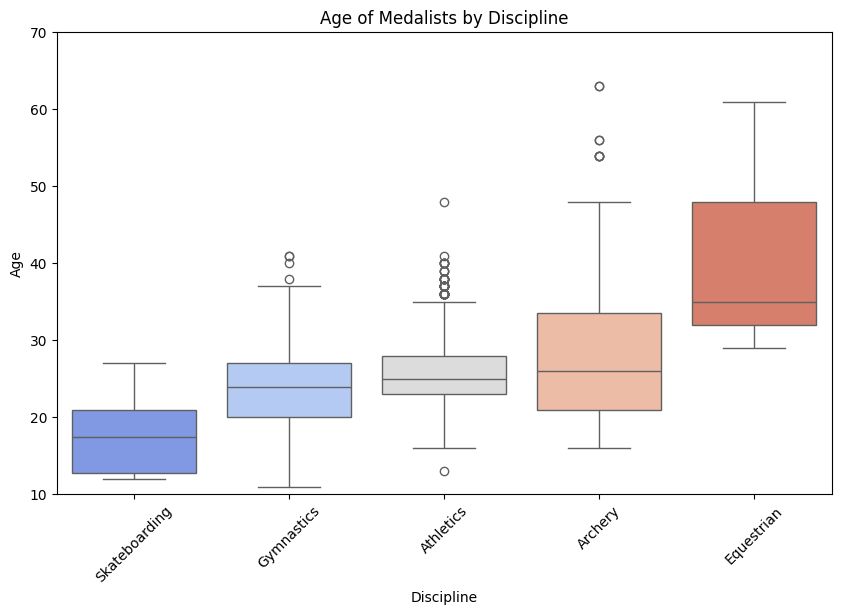

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='discipline_title', y='athlete_age', data=filtered_df, palette='coolwarm', order=['Skateboarding', 'Gymnastics', 'Athletics', 'Archery', 'Equestrian'])

plt.xlabel('Discipline')
plt.ylabel('Age')
plt.ylim(10, 70)
plt.title('Age of Medalists by Discipline')

plt.xticks(rotation=45)

plt.show()


In [24]:
results = pd.read_csv('olympic_results.csv')
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [25]:
results['year'] = results['slug_game'].str.slice(-4)
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN,2022
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN,2022
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN,2022
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN,2022
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN,2022


In [26]:
athlete_results = results.merge(athletes[['athlete_url', 'athlete_year_birth']], how='left', on='athlete_url')
athlete_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year,athlete_year_birth
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN,2022,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN,2022,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN,2022,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN,2022,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN,2022,NaN


In [27]:
athlete_results['discipline_title'] = athlete_results['discipline_title'].str.replace(r'.*gymnastics.*', 'Gymnastics', case=False, regex=True)

In [28]:
filtered_df = athlete_results[athlete_results['discipline_title'].isin(['Skateboarding', 'Gymnastics', 'Athletics', 'Archery', 'Equestrian'])]

In [29]:
filtered_df.loc[:, 'rank_position'] = filtered_df['rank_position'].str.replace('DNS', '20')
filtered_df.loc[:, 'rank_position'] = filtered_df['rank_position'].str.replace('DNF', '20')
filtered_df.loc[:, 'rank_position'] = filtered_df['rank_position'].str.replace('DSQ', '20')
filtered_df.loc[:, 'rank_position'] = filtered_df['rank_position'].fillna('20')

In [30]:
filtered_df['rank_position'] = filtered_df['rank_position'].astype(int)
filtered_df = filtered_df[filtered_df['rank_position'] > 3]

<ipython-input-30-72a93b1bea2c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
filtered_df.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year,athlete_year_birth
5898,Gymnastics,Men,tokyo-2020,Athlete,NaN,NaN,False,6,ROC,ROC,ROC,https://olympics.com/en/athletes/andrey-yudin,Andrey YUDIN,NaN,NaN,2020,1996.0
5901,Gymnastics,Men,tokyo-2020,Athlete,NaN,NaN,False,7,Japan,JP,JPN,https://olympics.com/en/athletes/daiki-kishi,Daiki KISHI,NaN,NaN,2020,1994.0
5902,Gymnastics,Men,tokyo-2020,Athlete,NaN,NaN,False,8,Australia,AU,AUS,https://olympics.com/en/athletes/dominic-clarke,Dominic CLARKE,NaN,NaN,2020,1997.0
5903,Gymnastics,Men,tokyo-2020,Athlete,NaN,NaN,False,4,Belarus,BY,BLR,https://olympics.com/en/athletes/uladzislau-ha...,Uladzislau HANCHAROU,NaN,NaN,2020,1995.0
5904,Gymnastics,Men,tokyo-2020,Athlete,NaN,NaN,False,5,ROC,ROC,ROC,https://olympics.com/en/athletes/dmitrii-ushakov,Dmitrii USHAKOV,NaN,NaN,2020,1988.0


In [32]:
filtered_df['athlete_age'] = filtered_df['year'].astype(int) - filtered_df['athlete_year_birth']

In [33]:
filtered_df = filtered_df.sort_values('athlete_age', ascending=True).reset_index(drop=True)
filtered_df = filtered_df[46:]
filtered_df.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year,athlete_year_birth,athlete_age
46,Skateboarding,Women's Park,tokyo-2020,Athlete,NaN,NaN,False,9,Germany,DE,GER,https://olympics.com/en/athletes/lilly-stoepha...,Lilly STOEPHASIUS,NaN,NaN,2020,2007.0,13.0
47,Athletics,110m hurdles men,helsinki-1952,Athlete,NaN,NaN,NaN,20,Brazil,BR,BRA,https://olympics.com/en/athletes/wilson-gomes-...,Wilson GOMES CARNEIRO,NaN,NaN,1952,1939.0,13.0
48,Skateboarding,Women's Park,tokyo-2020,Athlete,NaN,NaN,False,4,Japan,JP,JPN,https://olympics.com/en/athletes/misugu-okamoto,Misugu OKAMOTO,NaN,NaN,2020,2006.0,14.0
49,Gymnastics,individual all-round women,moscow-1980,Athlete,NaN,NaN,NaN,22,Spain,ES,ESP,https://olympics.com/en/athletes/irene-martine...,Irene MARTINEZ MECHA,73.850,POINTS,1980,1966.0,14.0
50,Gymnastics,individual all-round women,montreal-1976,Athlete,NaN,NaN,NaN,27,Canada,CA,CAN,https://olympics.com/en/athletes/karen-kelsall,Karen KELSALL,74.625,POINTS,1976,1962.0,14.0


In [34]:
filtered_df = filtered_df[~((filtered_df['discipline_title'] == 'Athletics') & (filtered_df['athlete_age'] < 17))]
filtered_df.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year,athlete_year_birth,athlete_age
46,Skateboarding,Women's Park,tokyo-2020,Athlete,NaN,NaN,False,9,Germany,DE,GER,https://olympics.com/en/athletes/lilly-stoepha...,Lilly STOEPHASIUS,NaN,NaN,2020,2007.0,13.0
48,Skateboarding,Women's Park,tokyo-2020,Athlete,NaN,NaN,False,4,Japan,JP,JPN,https://olympics.com/en/athletes/misugu-okamoto,Misugu OKAMOTO,NaN,NaN,2020,2006.0,14.0
49,Gymnastics,individual all-round women,moscow-1980,Athlete,NaN,NaN,NaN,22,Spain,ES,ESP,https://olympics.com/en/athletes/irene-martine...,Irene MARTINEZ MECHA,73.850,POINTS,1980,1966.0,14.0
50,Gymnastics,individual all-round women,montreal-1976,Athlete,NaN,NaN,NaN,27,Canada,CA,CAN,https://olympics.com/en/athletes/karen-kelsall,Karen KELSALL,74.625,POINTS,1976,1962.0,14.0
52,Gymnastics,individual all-round women,los-angeles-1984,Athlete,NaN,NaN,True,14,Spain,ES,ESP,https://olympics.com/en/athletes/laura-munoz-i...,Laura MUNOZ ILUNDAIN,76.225,POINTS,1984,1970.0,14.0
53,Skateboarding,Women's Park,tokyo-2020,Athlete,NaN,NaN,False,18,Great Britain,GB,GBR,https://olympics.com/en/athletes/bombette-martin,Bombette MARTIN,NaN,NaN,2020,2006.0,14.0
54,Gymnastics,individual all-round women,munich-1972,Athlete,NaN,NaN,NaN,13,Hungary,HU,HUN,https://olympics.com/en/athletes/krisztina-med...,Krisztina MEDVECZKY,74.450,POINTS,1972,1958.0,14.0
55,Skateboarding,Women's Park,tokyo-2020,Athlete,NaN,NaN,False,13,France,FR,FRA,https://olympics.com/en/athletes/madeleine-lar...,Madeleine LARCHERON,NaN,NaN,2020,2006.0,14.0
56,Gymnastics,individual all-round women,seoul-1988,Athlete,NaN,NaN,NaN,10,Canada,CA,CAN,https://olympics.com/en/athletes/mary-fuzesi,Mary FUZESI,NaN,NaN,1988,1974.0,14.0
57,Gymnastics,individual all-round women,montreal-1976,Athlete,NaN,NaN,NaN,36,Netherlands,NL,NED,https://olympics.com/en/athletes/monique-bolle...,Monique BOLLEBOOM,73.350,POINTS,1976,1962.0,14.0


In [35]:
filtered_df = filtered_df[filtered_df['athlete_age'].isna() == False]
filtered_df = filtered_df[filtered_df['athlete_age'] < 67]
filtered_df.tail(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year,athlete_year_birth,athlete_age
21484,Archery,york round (100y - 80y - 60y) men,london-1908,Athlete,NaN,NaN,NaN,5,Great Britain,GB,GBR,https://olympics.com/en/athletes/john-henry-br...,John Henry BRIDGES,687,POINTS,1908,1852.0,56.0
21485,Equestrian,Eventing Individual,tokyo-2020,Athlete,NaN,NaN,False,21,United States of America,US,USA,https://olympics.com/en/athletes/phillip-dutton,Phillip DUTTON,54.10,POINTS,2020,1963.0,57.0
21486,Archery,york round (100y - 80y - 60y) men,london-1908,Athlete,NaN,NaN,NaN,4,Great Britain,GB,GBR,https://olympics.com/en/athletes/james-penrose,James PENROSE,709,POINTS,1908,1850.0,58.0
21487,Equestrian,Jumping Individual,tokyo-2020,Athlete,NaN,NaN,False,20,Morocco,MA,MAR,https://olympics.com/en/athletes/abdelkebir-ou...,Abdelkebir OUADDAR,NaN,NaN,2020,1962.0,58.0
21488,Archery,individual FITA round women,munich-1972,Athlete,NaN,NaN,NaN,32,Canada,CA,CAN,https://olympics.com/en/athletes/marjorie-saun...,Marjorie SAUNDERS,"2,192",POINTS,1972,1913.0,59.0
21489,Equestrian,Jumping Individual,tokyo-2020,Athlete,NaN,NaN,False,20,Norway,NO,NOR,https://olympics.com/en/athletes/geir-gulliksen,Geir GULLIKSEN,NaN,NaN,2020,1960.0,60.0
21490,Equestrian,Dressage Individual,tokyo-2020,Athlete,NaN,NaN,False,20,Portugal,PT,POR,https://olympics.com/en/athletes/carlos-pinto,Carlos PINTO,NaN,NaN,2020,1959.0,61.0
21491,Archery,individual FITA Olympic round 70m men,sydney-2000,Athlete,NaN,NaN,NaN,61,Vanuatu,VU,VAN,https://olympics.com/en/athletes/francois-latil,François LATIL,NaN,NaN,2000,1938.0,62.0
21492,Archery,double american round (60y - 50y - 40y) men,st-louis-1904,Athlete,NaN,NaN,NaN,13,United States of America,US,USA,https://olympics.com/en/athletes/galen-carter-...,Galen Carter SPENCER,0.0,POINTS,1904,1840.0,64.0
21493,Equestrian,Dressage Individual,tokyo-2020,Athlete,NaN,NaN,False,40,Australia,AU,AUS,https://olympics.com/en/athletes/mary-hanna,Mary HANNA,NaN,NaN,2020,1954.0,66.0


<ipython-input-36-9d400710e541>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




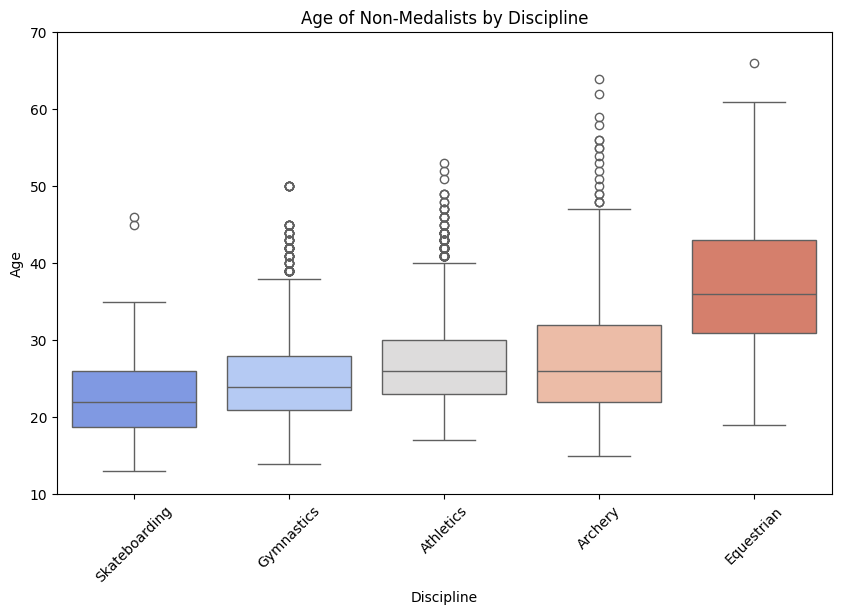

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='discipline_title', y='athlete_age', data=filtered_df, palette='coolwarm', order=['Skateboarding', 'Gymnastics', 'Athletics', 'Archery', 'Equestrian'])

plt.xlabel('Discipline')
plt.ylabel('Age')
plt.ylim(10, 70)
plt.title('Age of Non-Medalists by Discipline')

plt.xticks(rotation=45)

plt.show()

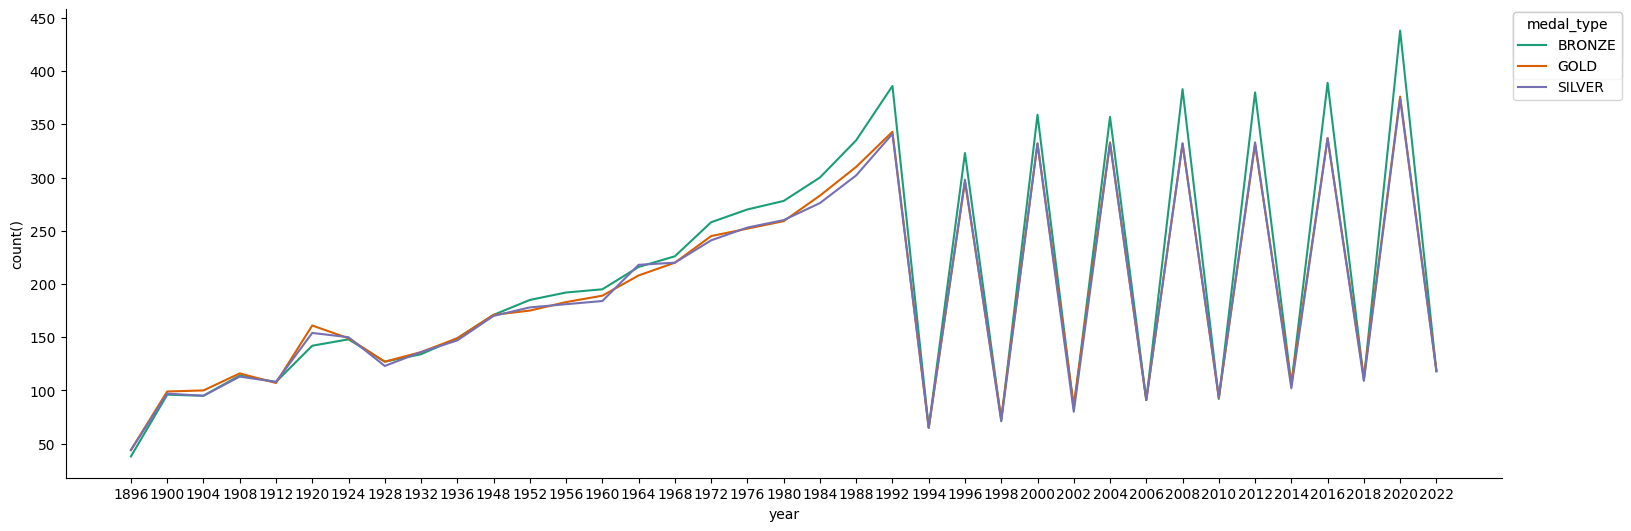

In [37]:
# @title year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = medals.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('medal_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='medal_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

In [38]:
athlete_medals = medals.merge(athletes[['athlete_url', 'athlete_year_birth']], how='left', on='athlete_url')

In [39]:
athlete_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year,athlete_year_birth
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,2022,1999.0
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,2022,1995.0
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2022,1986.0
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,1990.0
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,2022,1997.0


In [40]:
athlete_medals['athlete_age'] = athlete_medals['year'].astype(int) - athlete_medals['athlete_year_birth']

In [41]:
athlete_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year,athlete_year_birth,athlete_age
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,2022,1999.0,23.0
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,2022,1995.0,27.0
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2022,1986.0,36.0
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,1990.0,32.0
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,2022,1997.0,25.0


In [42]:
athlete_medals = athlete_medals[(athlete_medals['athlete_age'] > 10) & (athlete_medals['athlete_age'] < 70)]

In [43]:
athlete_medals['discipline_title'] = athlete_medals['discipline_title'].str.replace(r'.*gymnastics.*', 'Gymnastics', case=False, regex=True)
athlete_medals['discipline_title'] = athlete_medals['discipline_title'].str.replace(r'.*BMX.*', 'Cycling BMX', case=False, regex=True)

<ipython-input-43-b2692245e50e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
avg_age_by_event_df = athlete_medals.groupby('discipline_title')['athlete_age'].mean().reset_index(name='athlete_age')

In [45]:
sorted_df = avg_age_by_event_df.sort_values('athlete_age', ascending=True)

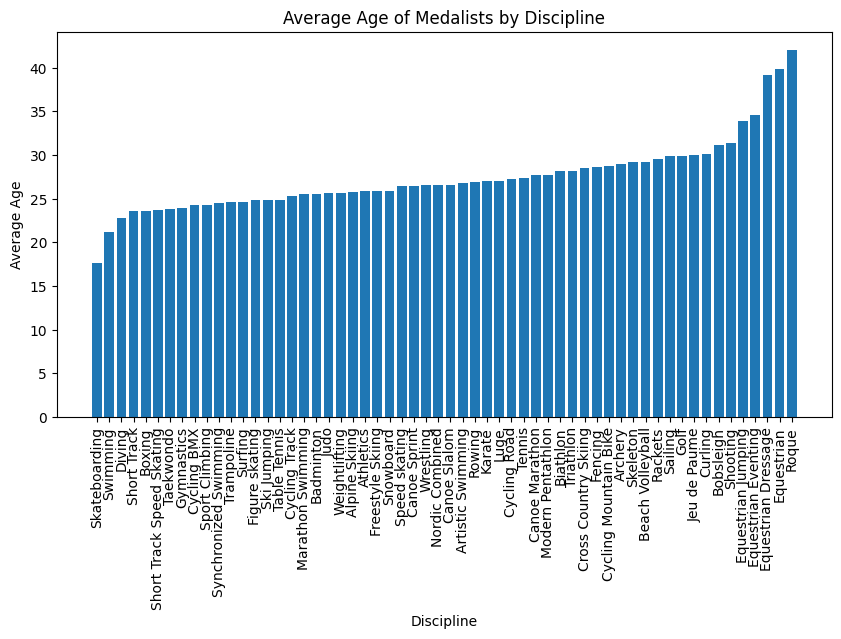

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(sorted_df['discipline_title'], sorted_df['athlete_age'])
plt.xticks(rotation=90)

plt.xlabel('Discipline')
plt.ylabel('Average Age')
plt.title('Average Age of Medalists by Discipline')

plt.show()

In [47]:
import seaborn as sb

In [48]:
medals_df['discipline_title'].value_counts()

,count
discipline_title,
Athletics,3080
Swimming,1763
Wrestling,1356
Rowing,1072
Boxing,996
...,...
Water Motorsports,3
Jeu de Paume,3
Roque,3


<ipython-input-49-d68ad9708e4e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




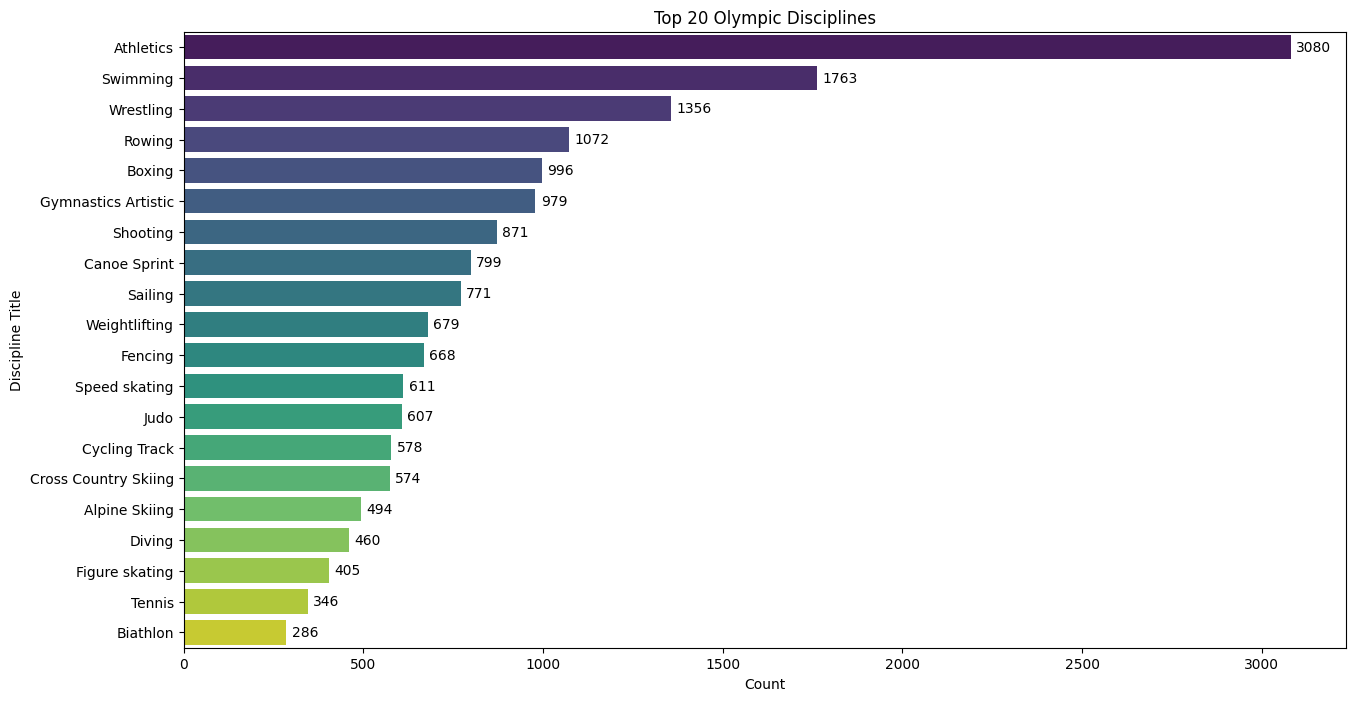

In [49]:
top_disciplines = medals_df['discipline_title'].value_counts().head(20)

plt.figure(figsize=(15, 8))

sb.barplot(x=top_disciplines.values, y=top_disciplines.index, palette="viridis")

plt.xlabel("Count")
plt.ylabel("Discipline Title")
plt.title("Top 20 Olympic Disciplines")

for index, value in enumerate(top_disciplines.values):
    plt.text(value + 15, index, str(value), va='center')

plt.show()

In [50]:
medals_df['slug_game'].value_counts()

,count
slug_game,
tokyo-2020,1188
rio-2016,1063
beijing-2008,1047
london-2012,1044
sydney-2000,1023
athens-2004,1022
atlanta-1996,917
barcelona-1992,887
seoul-1988,797


<ipython-input-51-befeb222b57f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




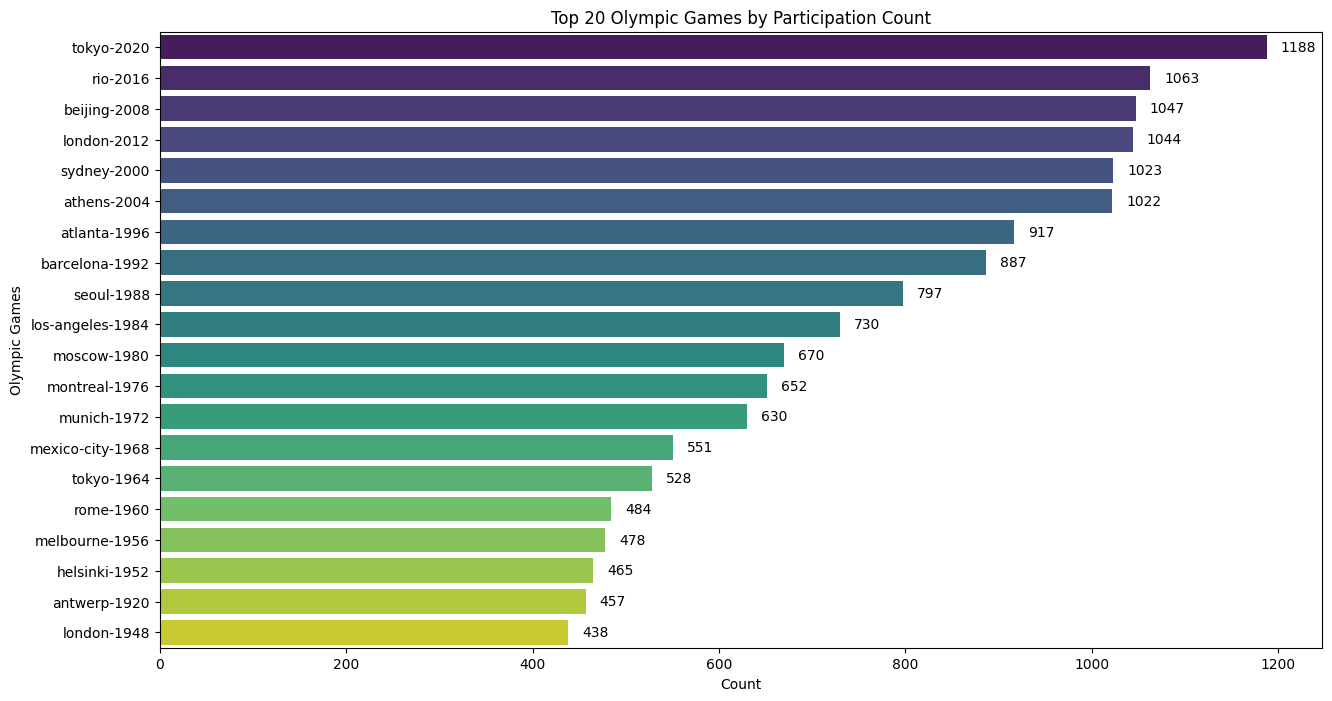

In [51]:
top_games = medals_df['slug_game'].value_counts().head(20)

plt.figure(figsize=(15, 8))

sb.barplot(x=top_games.values, y=top_games.index, palette="viridis")

plt.xlabel("Count")
plt.ylabel("Olympic Games")
plt.title("Top 20 Olympic Games by Participation Count")

for index, value in enumerate(top_games.values):
    plt.text(value + 15, index, str(value), va='center')

plt.show()

In [52]:
medals_df['participant_type'].value_counts()

,count
participant_type,
Athlete,15113
GameTeam,6584


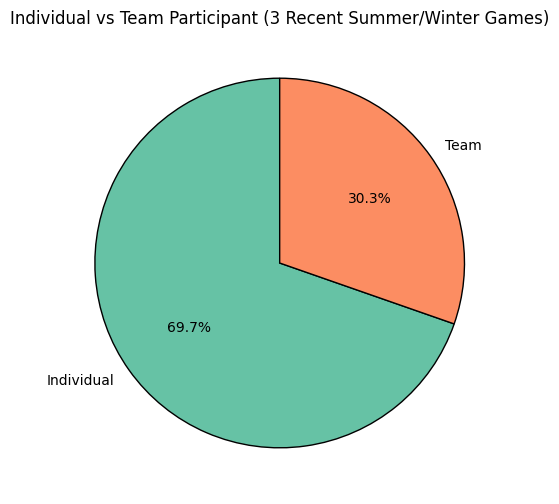

In [53]:
participant_counts = medals_df['participant_type'].value_counts()
participant_counts.index = ['Individual', 'Team']

plt.figure(figsize=(6, 6))
plt.pie(participant_counts, labels=participant_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Individual vs Team Participant (3 Recent Summer/Winter Games)")

plt.show()

In [54]:
# Define previous Olympics for comparison (Paris 2024 excluded)
previous_summer = {
    'london-2012': 'beijing-2008',
    'rio-2016': 'london-2012',
    'tokyo-2020': 'rio-2016'
}

previous_winter = {
    'sochi-2014': 'vancouver-2010',
    'pyeongchang-2018': 'sochi-2014',
    'beijing-2022': 'pyeongchang-2018'
}

# Function to find added and removed disciplines
def get_changes(df, game_mapping):
    changes = {}

    for game, prev_game in game_mapping.items():
        current_disciplines = set(df[df['slug_game'] == game]['discipline_title'].unique())
        previous_disciplines = set(df[df['slug_game'] == prev_game]['discipline_title'].unique())

        added = current_disciplines - previous_disciplines
        removed = previous_disciplines - current_disciplines

        changes[game] = {'added': list(added), 'removed': list(removed)}

    return changes

# Get proper comparisons
summer_changes = get_changes(medals_df, previous_summer)
winter_changes = get_changes(medals_df, previous_winter)

# Display results
print("\n🔹 **Changes in Summer Olympics**")
for game, change in summer_changes.items():
    print(f"\n🏅 {game.upper()} (Compared to {previous_summer[game].upper()})")
    print(f"  ➕ Added: {', '.join(change['added']) if change['added'] else 'None'}")
    print(f"  ➖ Removed: {', '.join(change['removed']) if change['removed'] else 'None'}")

print("\n🔹 **Changes in Winter Olympics**")
for game, change in winter_changes.items():
    print(f"\n❄️ {game.upper()} (Compared to {previous_winter[game].upper()})")
    print(f"  ➕ Added: {', '.join(change['added']) if change['added'] else 'None'}")
    print(f"  ➖ Removed: {', '.join(change['removed']) if change['removed'] else 'None'}")


🔹 **Changes in Summer Olympics**

🏅 LONDON-2012 (Compared to BEIJING-2008)
  ➕ Added: None
  ➖ Removed: Softball, Baseball

🏅 RIO-2016 (Compared to LONDON-2012)
  ➕ Added: Rugby, Golf
  ➖ Removed: None

🏅 TOKYO-2020 (Compared to RIO-2016)
  ➕ Added: Trampoline Gymnastics, Artistic Swimming, Rhythmic Gymnastics, Karate, Cycling BMX Racing, Sport Climbing, Rugby Sevens, 3x3 Basketball, Cycling BMX Freestyle, Skateboarding, Artistic Gymnastics, Equestrian, Baseball/Softball, Surfing
  ➖ Removed: Synchronized Swimming, Equestrian Eventing, Gymnastics Rhythmic, Equestrian Dressage, Rugby, Cycling BMX, Trampoline, Gymnastics Artistic, Equestrian Jumping

🔹 **Changes in Winter Olympics**

❄️ SOCHI-2014 (Compared to VANCOUVER-2010)
  ➕ Added: None
  ➖ Removed: None

❄️ PYEONGCHANG-2018 (Compared to SOCHI-2014)
  ➕ Added: Short Track
  ➖ Removed: Short Track Speed Skating

❄️ BEIJING-2022 (Compared to PYEONGCHANG-2018)
  ➕ Added: Short Track Speed Skating
  ➖ Removed: Short Track


In [55]:
medal_points = {'GOLD': 3, 'SILVER': 2, 'BRONZE': 1}
medals_df['medal_score'] = medals_df['medal_type'].map(medal_points)

medals_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,medal_score
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,3
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,3
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,1


<ipython-input-56-99e633ba5c99>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




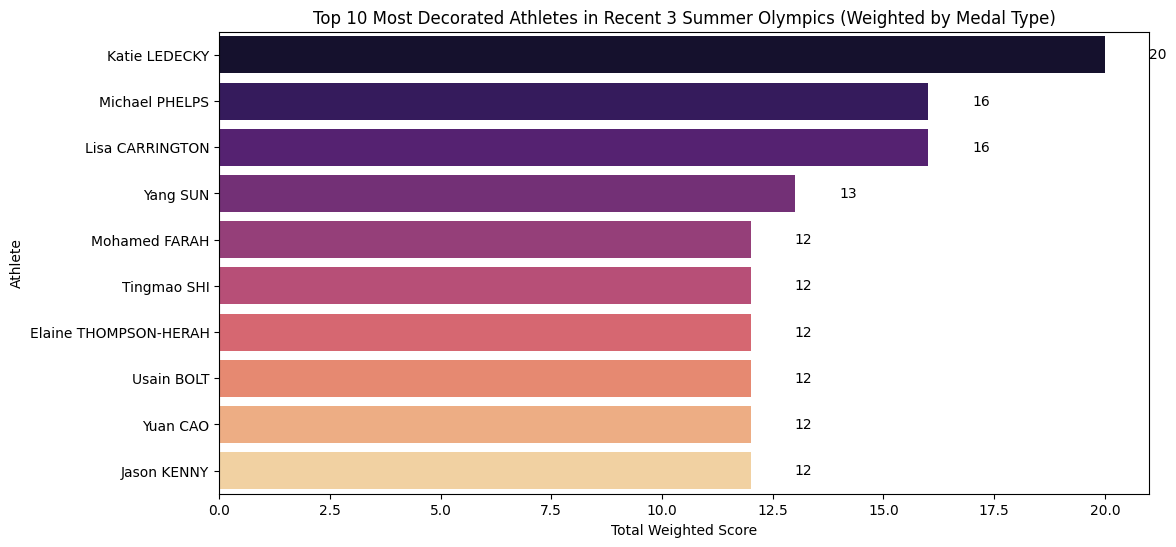

<ipython-input-56-99e633ba5c99>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




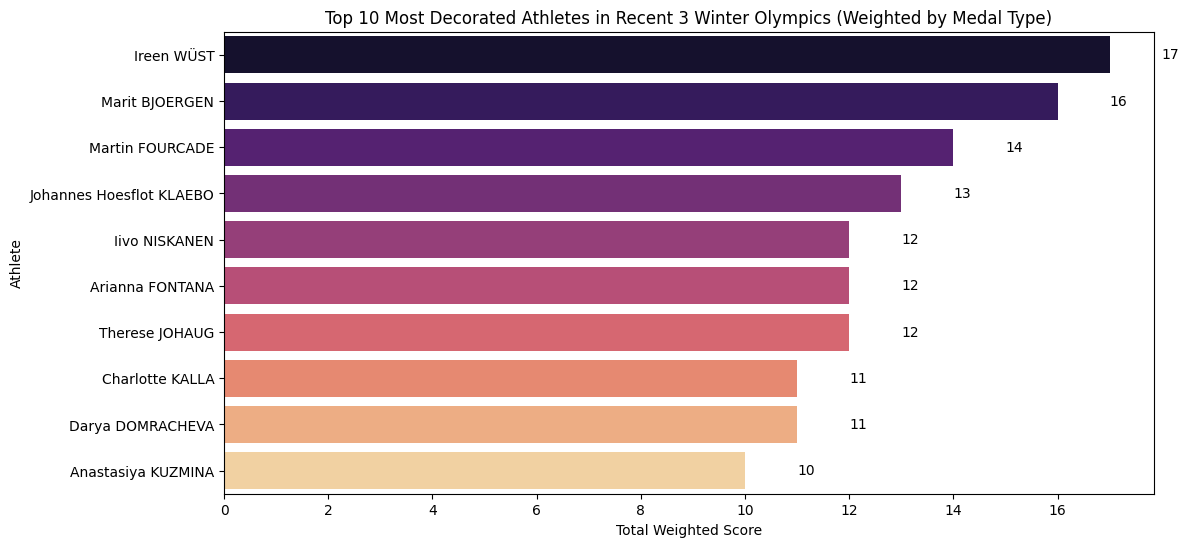

In [56]:
# Define recent Summer and Winter Olympic Games
recent_summer_games = ['tokyo-2020', 'rio-2016', 'london-2012']
recent_winter_games = ['beijing-2022', 'pyeongchang-2018', 'sochi-2014']

# Filter dataset for recent Summer and Winter Olympics
summer_df = medals_df[medals_df['slug_game'].isin(recent_summer_games)]
winter_df = medals_df[medals_df['slug_game'].isin(recent_winter_games)]

# Function to plot top athletes
def plot_top_athletes(data, title):
    athlete_scores = data.groupby('athlete_full_name')['medal_score'].sum().reset_index()
    top_athletes = athlete_scores.sort_values(by='medal_score', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sb.barplot(x=top_athletes['medal_score'], y=top_athletes['athlete_full_name'], palette="magma")

    plt.xlabel("Total Weighted Score")
    plt.ylabel("Athlete")
    plt.title(title)

    # Annotate values on bars
    for index, value in enumerate(top_athletes['medal_score']):
        plt.text(value + 1, index, str(value), va='center')

    plt.show()

# Plot for Summer Olympics
plot_top_athletes(summer_df, "Top 10 Most Decorated Athletes in Recent 3 Summer Olympics (Weighted by Medal Type)")

# Plot for Winter Olympics
plot_top_athletes(winter_df, "Top 10 Most Decorated Athletes in Recent 3 Winter Olympics (Weighted by Medal Type)")